In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=4,random_state=0, cluster_std=0.4)

C:\Users\sachi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


make blobs for clustering using make_blobs from samples_generator

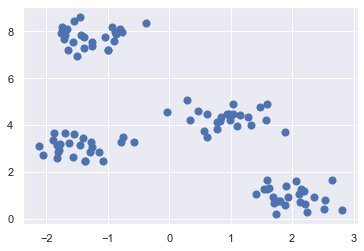

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='spring');

In [4]:
def distance(x,y):
    dis = math.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)
    return dis

defining a distance function to calculate distance of the (random) centroid from all the samples

In [5]:
distance(np.array([5,-1]),np.array([6,2]))

3.1622776601683795

In [6]:
def clusterassignment(x,means):
    diff = []
    for mean in means:
        diff.append(distance(x,mean))
    return diff.index(min(diff)) 

defining a cluster assignment function to assign samples to K clusters based on the distance of each sample from the nearest centroid 


In [7]:
clusterassignment([5,6],[[5,7],[5,6],[5,7]])

1

In [8]:
def kmean(allx,k):
    means = allx[np.random.choice(allx.shape[0], k, replace=False), :]
    c = np.empty(allx.shape[0])
    for x,i in zip(allx,range(allx.shape[0])):
        c[i] = clusterassignment(x,means)
        
    for i in range(k):
        index_ = np.where(c==i)
        means[i] = np.sum(allx[index_],axis=0) / len(allx[index_])
        
    j = np.sum(np.apply_along_axis(np.linalg.norm, 1, (allx - means[c.astype(int),:]))**2)
            
    return means,c,j

In [9]:
mean=[]
clsuter = []
cost_ = []
for i  in range(1000):
    means_,c_ ,cost=kmean(X,4)
    mean.append(means_)
    clsuter.append(c_)
    cost_.append(cost)

choosing the means/centroids with minimum cost

In [10]:
min_cost_index=(cost_.index(min(cost_)))
means_ = mean[min_cost_index]
c_ = clsuter[min_cost_index]
means_

array([[-1.48886624,  3.07731162],
       [ 2.00454873,  0.9520213 ],
       [-1.26414502,  7.77811813],
       [ 0.93588159,  4.3205638 ]])

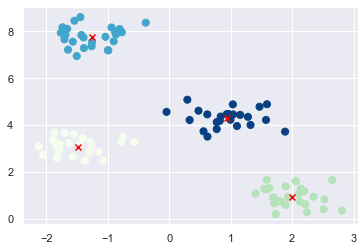

In [11]:
plt.scatter(X[:, 0], X[:, 1], s=50,c=c_, cmap='GnBu');
plt.scatter(means_[:, 0], means_[:, 1],color = 'red',marker='x')
plt.show()